In [1]:
import torch
from torch import nn
from dataset import yolo_dataset
from model import YOLO
from create_dataset import create_image
from torchvision import transforms
from matplotlib.pyplot import imshow
from torch.functional import F
from PIL import Image, ImageDraw
from utils import predict, desenhar_anotacoes
from torchvision.ops.boxes import box_iou, nms, batched_nms

In [2]:
ch = torch.load('./models/checkpoint_9_epochs.pth', map_location=torch.device('cpu'))
model = YOLO(ch['S'], ch['C'], ch['B'], ch['IMG_SIZE'], ch['architecture_config'])
print (model.load_state_dict(ch['state_dict']))

transformer = transforms.Compose([
    transforms.Resize((ch['IMG_SIZE'], ch['IMG_SIZE'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=(.5, .5, .5), std=(.5, .5, .5))
])

<All keys matched successfully>


[[1.0102102, 0.6120476126670837, 1, 76.96818701922894, 46.47955386340618, 119.87679682672024, 91.2572541385889], [1.0150422, 0.7101104259490967, 1, 78.58300682157278, 46.81903876783326, 127.8881685808301, 96.97331136884168], [1.0112906, 0.7611781358718872, 1, 128.10981504619122, 114.28839357942343, 175.39129175245762, 164.4600825086236], [0.98844445, 0.5974519848823547, 1, 128.01281943917274, 125.39067973569036, 168.93243625760078, 169.90400183573365]]


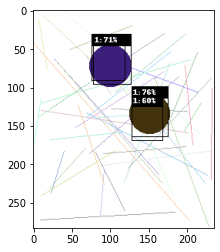

In [3]:
img_pil, bbox_true = create_image(2)
img_pil, bbox_predict = predict(model, img_pil, transformer, prob_threshold=0.55, print_grid=False)
imshow(img_pil)
print (bbox_predict)

# Considerar NMS para as detecções

In [4]:
predict_tensor = torch.tensor(bbox_predict)
print (f'{predict_tensor=}')
box_scores = predict_tensor[...,1]
bboxes_tensor = predict_tensor[...,-4:]
print (f'{box_scores=}')
print (f'{bboxes_tensor=}')

predict_tensor=tensor([[  1.0102,   0.6120,   1.0000,  76.9682,  46.4796, 119.8768,  91.2573],
        [  1.0150,   0.7101,   1.0000,  78.5830,  46.8190, 127.8882,  96.9733],
        [  1.0113,   0.7612,   1.0000, 128.1098, 114.2884, 175.3913, 164.4601],
        [  0.9884,   0.5975,   1.0000, 128.0128, 125.3907, 168.9324, 169.9040]],
       dtype=torch.float64)
box_scores=tensor([0.6120, 0.7101, 0.7612, 0.5975], dtype=torch.float64)
bboxes_tensor=tensor([[ 76.9682,  46.4796, 119.8768,  91.2573],
        [ 78.5830,  46.8190, 127.8882,  96.9733],
        [128.1098, 114.2884, 175.3913, 164.4601],
        [128.0128, 125.3907, 168.9324, 169.9040]], dtype=torch.float64)


In [5]:
nms(bboxes_tensor, box_scores, iou_threshold=0.1)

tensor([2, 1])